# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [17]:
missing_values = ["?", "", "n/a", "--"]
df = pd.read_csv("G:/Data science/DS_ML_Project/datasets/autos.csv", na_values=missing_values)
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [18]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

<Axes: >

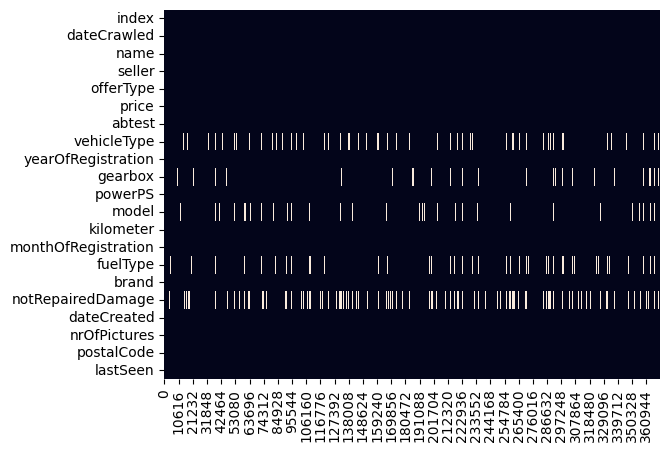

In [16]:
sns.heatmap(df.isna().transpose(), cbar=False)

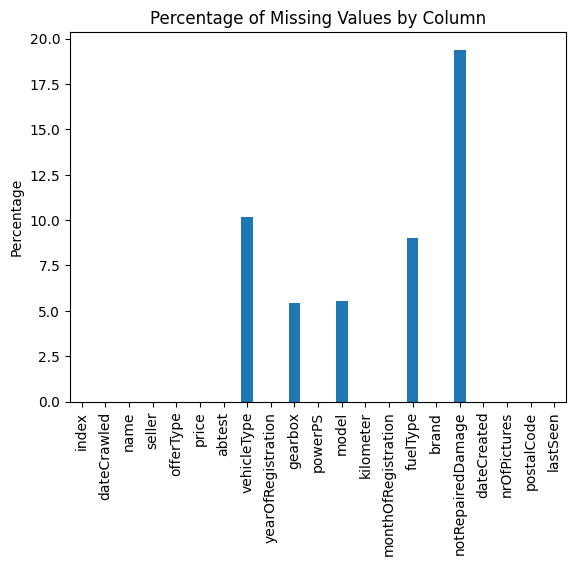

In [25]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.show()

In [24]:
df.isnull().sum() / len(df) * 100

index                   0.000000
dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

In [28]:
df.drop("index", axis="columns", inplace=True)

In [29]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [32]:
date = df[["dateCrawled"]].head()
date

,dateCrawled
0,2016-03-24 11:52:17
1,2016-03-24 10:58:45
2,2016-03-14 12:52:21
3,2016-03-17 16:54:04
4,2016-03-31 17:25:20


# changing columns which is object to datetime

In [40]:
def change_to_datetime(column):
    df[column] = pd.to_datetime(df[column])

In [41]:
for col in ["dateCrawled", "dateCreated", "lastSeen"]:
    change_to_datetime(col)


In [42]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [43]:
date_time = ["dateCrawled", "dateCreated", "lastSeen"]

In [44]:
df[date_time].head()

,dateCrawled,dateCreated,lastSeen
0,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21


In [53]:
df["dateCrawled"].dt.second

0         17
1         45
2         21
3          4
4         20
          ..
371523    27
371524    21
371525    12
371526     8
371527    19
Name: dateCrawled, Length: 371528, dtype: int32